# Loan Status Classification Model

# Problem Statement:-
Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

The Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

It’s a classification problem , given information about the application we have to predict whether the they’ll be to pay the loan or not.

# Introduction:-
In this notebook ,we will try to show you how different models can improve just by doing simple processing on the data .
We are going to work on binary classification problem, where we got some information about sample of peoples , and we need to predict whether we should give some one a loan or not depending on his information .So we will go with machine learning techniques to solve our problem .

# Columns Description:-

1.__Loan_ID__ : Unique Loan ID<br>
2.__Gender__ : Male/ Female<br>
3.__Married__ : Applicant married (Y/N)<br>
4.__Dependents__ : Number of dependents <br>
5.__Education__ : Applicant Education (Graduate/ Under Graduate)<br>
6.__Self_Employed__ : Self employed (Y/N)<br>
7.__ApplicantIncome__ : Applicant income<br>
8.__CoapplicantIncome__ : Coapplicant income<br>
9.__LoanAmount__: Loan amount in thousands of dollars<br>
10.__Loan_Amount_Term__ : Term of loan in months<br>
11.__Credit_History__ : credit history meets guidelines yes or no<br>
12.__Property_Area__ : Urban/ Semi Urban/ Rural<br>
13.__Loan_Status__ : Loan approved (Y/N) this is the target variable<br>

In [1]:
#importing the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier 

In [2]:
#loading the train and test data
train_df=pd.read_csv("train_data.csv")
test_df=pd.read_csv("test_data.csv")

In [3]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [4]:
test_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [5]:
#Train Data Pre-processing

In [6]:
#checking shape of train data
train_df.shape

(614, 13)

In [7]:
#Inspecting each and every categorical columns and the type of value present in it
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
#Storing all the categorical columns in a single list
cat_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [9]:
#checking all the value counts of the categorical columns
for col in cat_cols:
    print(f"{col}:\n{train_df[col].value_counts()}\n","-"*30)

Gender:
Male      489
Female    112
Name: Gender, dtype: int64
 ------------------------------
Married:
Yes    398
No     213
Name: Married, dtype: int64
 ------------------------------
Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
 ------------------------------
Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
 ------------------------------
Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64
 ------------------------------
Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
 ------------------------------
Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64
 ------------------------------


In [10]:
#Checking for missing values:-
train_df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
#checking the percent of missing value in each columns
train_df.isnull().sum()/len(train_df)*100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

---__As, the percent of missing value in each columns is less than 10% so we can drop those values for the numerical columns and for the numerical columns we can use the mean/median method which ever is suitable and in which the distribution remains the same i.e before and after removing the missing values__ 

In [12]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [13]:
#MISSING VALUE TREATMENT OF VARIOUS NUMERICAL COLUMNS

In [14]:
#LoanAmount
train_df['LoanAmount_mean']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())

In [15]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,146.412162
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.000000


85.58732523570545
84.0374676831965


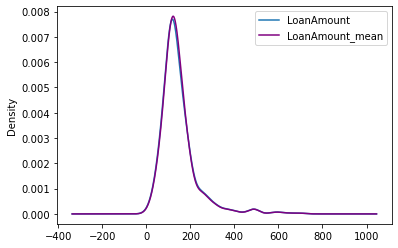

In [16]:
print(train_df['LoanAmount'].std())
print(train_df['LoanAmount_mean'].std())
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
train_df['LoanAmount'].plot(kind='kde', ax=ax)
train_df['LoanAmount_mean'].plot(kind='kde', ax=ax, color='purple')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

As, the distribution of Loan is same Amount before and after filling the missing values with mean so we can use this technique for the 
filling of missing values.

In [17]:
#Loan Amount Term

In [18]:
train_df['Loan_Amount_Term_mean']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())

65.12040985461256
64.37248862679246


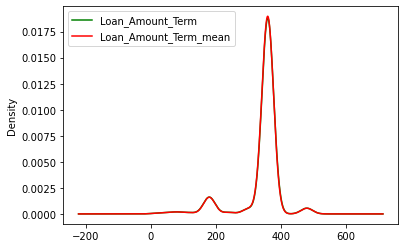

In [19]:
print(train_df['Loan_Amount_Term'].std())
print(train_df['Loan_Amount_Term_mean'].std())
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
train_df['Loan_Amount_Term'].plot(kind='kde', ax=ax,color='green')
train_df['Loan_Amount_Term_mean'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

As, the distribution of Loan Amount term is same before and after filling the missing values with mean so we can use this technique for the filling of missing values.

In [20]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_mean,Loan_Amount_Term_mean
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,146.412162,360.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,128.000000,360.0


In [21]:
#Dropping the extra columns created and filling the missing values in the actual columns

In [22]:
train_df.drop(['LoanAmount_mean','Loan_Amount_Term_mean'],axis=1,inplace=True)

In [23]:
train_df['LoanAmount']=train_df['LoanAmount'].fillna(train_df['LoanAmount'].mean())
train_df['Loan_Amount_Term']=train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mean())

In [24]:
train_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N


In [25]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [26]:
#MISSING VALUE TREATMENT OF VARIOUS CATEGORICAL COLUMNS

In [27]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)

In [28]:
train_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [30]:
train_df.head(4)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y


In [31]:
#dropping the Loan_ID column as it is irrelevant while creating the model
train_df.drop('Loan_ID',axis=1,inplace=True)

In [32]:
#Converting the Categorical columns into numerical format, so the machine learning model can learn easily

In [33]:
train_df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [34]:
#male is replaced with 1 and Female is replaced with 0
train_df['Gender'] = np.where(train_df['Gender'] == "Male", 1, 0)

In [35]:
train_df['Gender'].value_counts()

1    502
0    112
Name: Gender, dtype: int64

In [36]:
train_df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

In [37]:
#married is replaced with 1 and not marries is replaced with 0
train_df['Married'] = np.where(train_df['Married'] == "Yes", 1, 0)

In [38]:
train_df['Married'].value_counts()

1    401
0    213
Name: Married, dtype: int64

In [39]:
train_df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [40]:
#Graduate is replaced with 1 and Not Graduate is replaced with 0
train_df['Education'] = np.where(train_df['Education'] == "Graduate", 1, 0)

In [41]:
train_df['Education'].value_counts()

1    480
0    134
Name: Education, dtype: int64

In [42]:
train_df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

In [43]:
#self_employed is replaced with 1 and not self employed  is replaced with 0
train_df['Self_Employed'] = np.where(train_df['Self_Employed'] == "Yes", 1, 0)

In [44]:
train_df['Self_Employed'].value_counts()

0    532
1     82
Name: Self_Employed, dtype: int64

In [45]:
train_df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [46]:
#replacing Semiurban with 1,urban with 2,Rural with 3
train_df['Property_Area'] = train_df['Property_Area'].replace(['Semiurban', 'Urban','Rural'], [1,2,3])

In [47]:
train_df['Property_Area'].value_counts()

1    233
2    202
3    179
Name: Property_Area, dtype: int64

In [48]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [49]:
#replacing Y with 1 and N with 0
train_df['Loan_Status'] = np.where(train_df['Loan_Status'] == "Y", 1, 0)

In [50]:
train_df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [51]:
train_df['Dependents']=train_df['Dependents'].replace('3+','3')

In [52]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,3,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

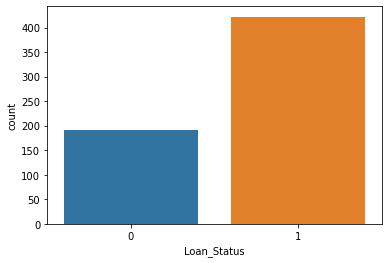

In [53]:
#checking for the data balanace of the Target Column
sns.countplot('Loan_Status',data=train_df)

So, this is an imbalanced dataset so we need to make Dataset balance i.e count of __0__ should be __Equal__ to count of __1__ because if that data is imbalaced so the model can be __Biased__ towards the value with higher Count

In [54]:
#dividing the the value of the target columns into two different dataframes
loan_accept=train_df[train_df['Loan_Status']==1]
loan_denied=train_df[train_df['Loan_Status']==0]

In [55]:
loan_accept.shape

(422, 12)

In [56]:
loan_denied.shape

(192, 12)

In [57]:
loan_accept['Loan_Status'].value_counts()

1    422
Name: Loan_Status, dtype: int64

In [58]:
loan_denied['Loan_Status'].value_counts()

0    192
Name: Loan_Status, dtype: int64

In [59]:
#taking a sample of n=192 from loan accpet Dataset
loan_accept_sample=loan_accept.sample(n=192)

In [60]:
#concatinating the two data frames
final_df=pd.concat([loan_accept_sample,loan_denied],axis=0)

In [61]:
final_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
543,1,1,1,0,0,2239,2524.0,128.0,360.0,1.0,2,1
255,0,0,3,1,0,3083,0.0,255.0,360.0,1.0,3,1


In [62]:
final_df.shape

(384, 12)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

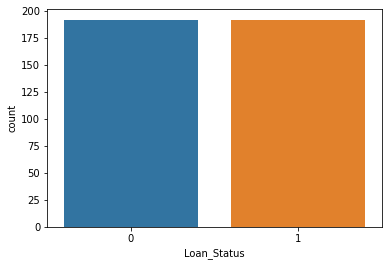

In [63]:
#checking for the data balanace of the Target Column
sns.countplot('Loan_Status',data=final_df)

So, after sampling method the target column of our dataset is now __Balanced__ so we can proceed further for the model implementation techniques.

In [64]:
#Performing Range Level Strandarization
rls=MinMaxScaler()

In [65]:
final_df['ApplicantIncome']=rls.fit_transform(final_df[['ApplicantIncome']])

In [66]:
final_df['LoanAmount']=rls.fit_transform(final_df[['LoanAmount']])
final_df['Loan_Amount_Term']=rls.fit_transform(final_df[['Loan_Amount_Term']])

In [67]:
final_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
543,1,1,1,0,0,0.025838,2524.0,0.172214,0.72973,1.0,2,1
255,0,0,3,1,0,0.036277,0.0,0.356006,0.72973,1.0,3,1


# MODEL IMPLEMENTATION

First of all we will divide our dataset into two variables __x__ as the features we defined earlier and __y__ as the Loan_Status the target value we want to predict.

# Models we will use:
__1.Logistic Regression__<br>
__2.Decision Tree__<br>
__3.Random Forest__<br>
__4.XGBoost__<br>


In [68]:
#Dividing the feature(a)columns and target(b) columns
a=final_df.drop('Loan_Status',axis=1)
b=final_df['Loan_Status']

In [69]:
#selecting the best Features
model=ExtraTreesClassifier()
model.fit(a,b)

ExtraTreesClassifier()

In [70]:
print(model.feature_importances_)

[0.02446432 0.02326246 0.06954418 0.03081566 0.02675689 0.18030426
 0.12508953 0.18192479 0.0522079  0.23745055 0.04817945]


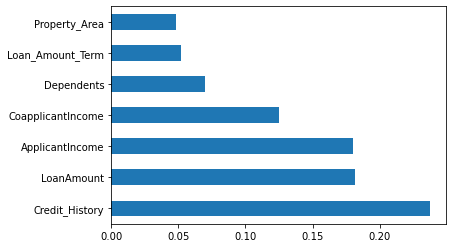

In [71]:
ranked_features=pd.Series(model.feature_importances_,index=a.columns)
ranked_features.nlargest(7).plot(kind='barh')
plt.show()

In [72]:
#Dividing the feature(x)columns and target(y) columns and selecting the best columns
x=final_df[['Property_Area','Loan_Amount_Term','Dependents','CoapplicantIncome','ApplicantIncome','LoanAmount','Credit_History']]
y=final_df['Loan_Status']

In [73]:
x.head(2)

,Property_Area,Loan_Amount_Term,Dependents,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History
543,2,0.72973,1,2524.0,0.025838,0.172214,1.0
255,3,0.72973,3,0.0,0.036277,0.356006,1.0


In [74]:
x.shape

(384, 7)

In [75]:
y.head(2)

543    1
255    1
Name: Loan_Status, dtype: int32

In [76]:
y.shape

(384,)

In [77]:
#performing Train Test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=109)

# LOGISTIC REGRESSION:-

In [78]:
lr=LogisticRegression()

In [79]:
lr.fit(x_train,y_train)

LogisticRegression()

In [80]:
#ACCURACY CHECK:-

In [81]:
#On Training Data
train1=lr.predict(x_train)
accuracy_train1=metrics.accuracy_score(train1,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train1*100,"%")

ACCURACY ON TRAINING DATA IS :-- 70.35830618892508 %


In [82]:
#On Testing Data
test1=lr.predict(x_test)
accuracy_test1=metrics.accuracy_score(test1,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test1*100,"%")

ACCURACY ON TESTING DATA IS :-- 64.93506493506493 %


In [83]:
#CONFUSION MATRIX:-

In [84]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,train1))

THE CONFUSION MATRIX IS 
[[103  54]
 [ 37 113]]


In [85]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,test1))

THE CONFUSION MATRIX IS 
[[25 10]
 [17 25]]


In [86]:
#ROC-AUC CURVE:-

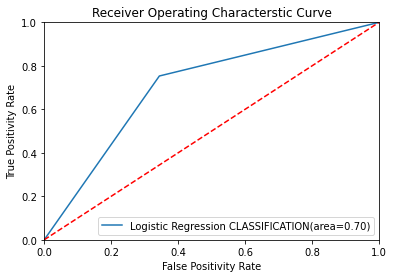

In [87]:
#On Training Data
auc=metrics.roc_auc_score(y_train,train1)
fpr,tpr,thresolds=metrics.roc_curve(y_train,train1)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression CLASSIFICATION(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

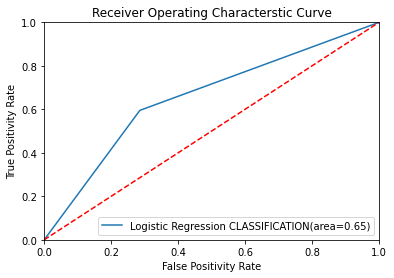

In [88]:
#On Testing Data
auc=metrics.roc_auc_score(y_test,test1)
fpr,tpr,thresolds=metrics.roc_curve(y_test,test1)
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression CLASSIFICATION(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# DECISION TREE:-

In [89]:
dt=DecisionTreeClassifier()

In [90]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [91]:
#ACCURACY CHECK:-

In [92]:
#On Training Data
train2=dt.predict(x_train)
accuracy_train2=metrics.accuracy_score(train2,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train2*100,"%")

ACCURACY ON TRAINING DATA IS :-- 100.0 %


In [93]:
#On Testing Data
test2=dt.predict(x_test)
accuracy_test2=metrics.accuracy_score(test2,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test2*100,"%")

ACCURACY ON TESTING DATA IS :-- 66.23376623376623 %


In [94]:
#CONFUSION MATRIX:-

In [95]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,train2))

THE CONFUSION MATRIX IS 
[[157   0]
 [  0 150]]


In [96]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,test2))

THE CONFUSION MATRIX IS 
[[28  7]
 [19 23]]


In [97]:
#ROC-AUC CURVE:-

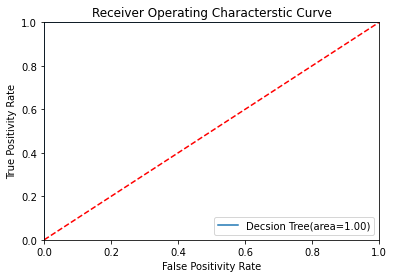

In [98]:
#On Training Data
auc=metrics.roc_auc_score(y_train,train2)
fpr,tpr,thresolds=metrics.roc_curve(y_train,train2)
plt.figure()
plt.plot(fpr,tpr,label='Decsion Tree(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

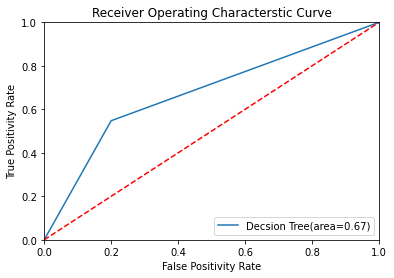

In [99]:
#On Testing Data
auc=metrics.roc_auc_score(y_test,test2)
fpr,tpr,thresolds=metrics.roc_curve(y_test,test2)
plt.figure()
plt.plot(fpr,tpr,label='Decsion Tree(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# RANDOM FOREST CLASSIFIER:-

In [100]:
rf=RandomForestClassifier()

In [101]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [102]:
#ACCURACY CHECK:-

In [103]:
#On Training Data
train3=rf.predict(x_train)
accuracy_train3=metrics.accuracy_score(train3,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train3*100,"%")

ACCURACY ON TRAINING DATA IS :-- 100.0 %


In [104]:
#On Testing Data
test3=rf.predict(x_test)
accuracy_test3=metrics.accuracy_score(test3,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test3*100,"%")

ACCURACY ON TESTING DATA IS :-- 61.038961038961034 %


In [105]:
#CONFUSION MATRIX:-

In [106]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,train3))

THE CONFUSION MATRIX IS 
[[157   0]
 [  0 150]]


In [107]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,test3))

THE CONFUSION MATRIX IS 
[[25 10]
 [20 22]]


In [108]:
#ROC-AUC CURVE:-

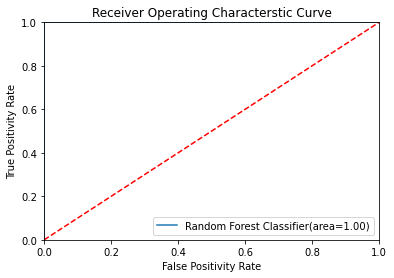

In [109]:
#On Training Data
auc=metrics.roc_auc_score(y_train,train3)
fpr,tpr,thresolds=metrics.roc_curve(y_train,train3)
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

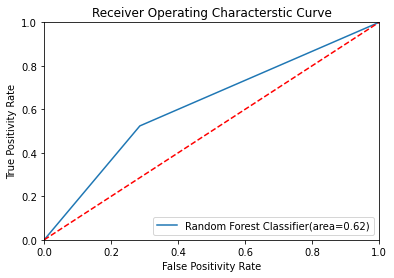

In [110]:
#On Testing Data
auc=metrics.roc_auc_score(y_test,test3)
fpr,tpr,thresolds=metrics.roc_curve(y_test,test3)
plt.figure()
plt.plot(fpr,tpr,label='Random Forest Classifier(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# KNN:-

In [111]:
knc=KNeighborsClassifier(n_neighbors=5)

In [112]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

In [113]:
#ACCURACY CHECK:-

In [114]:
#On Training Data
train4=knc.predict(x_train)
accuracy_train4=metrics.accuracy_score(train4,y_train)
print('ACCURACY ON TRAINING DATA IS :--',accuracy_train4*100,"%")

ACCURACY ON TRAINING DATA IS :-- 68.07817589576547 %


In [115]:
#On Testing Data
test4=knc.predict(x_test)
accuracy_test4=metrics.accuracy_score(test4,y_test)
print('ACCURACY ON TESTING DATA IS :--',accuracy_test4*100,"%")

ACCURACY ON TESTING DATA IS :-- 61.038961038961034 %


In [116]:
#CONFUSION MATRIX:-

In [117]:
#On Training Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_train,train4))

THE CONFUSION MATRIX IS 
[[ 97  60]
 [ 38 112]]


In [118]:
#On Testing Data
print("THE CONFUSION MATRIX IS " )
print(metrics.confusion_matrix(y_test,test4))

THE CONFUSION MATRIX IS 
[[18 17]
 [13 29]]


In [119]:
#ROC-AUC CURVE:-

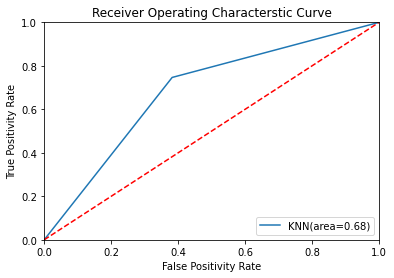

In [120]:
#On Training Data
auc=metrics.roc_auc_score(y_train,train4)
fpr,tpr,thresolds=metrics.roc_curve(y_train,train4)
plt.figure()
plt.plot(fpr,tpr,label='KNN(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

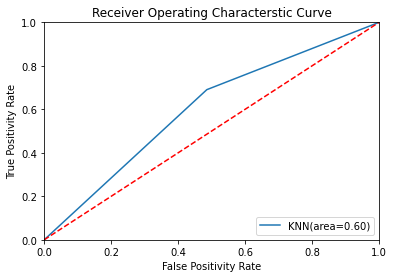

In [121]:
#On Testing Data
auc=metrics.roc_auc_score(y_test,test4)
fpr,tpr,thresolds=metrics.roc_curve(y_test,test4)
plt.figure()
plt.plot(fpr,tpr,label='KNN(area=%0.2f)'%auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel('False Positivity Rate')
plt.ylabel('True Positivity Rate')
plt.title('Receiver Operating Characterstic Curve')
plt.legend(loc='lower right')
plt.show()

# CONCLUSION:-

So, from the above mentioned Models the accuracy in both training and testing set are:- <br>
<br>

| MODEL_NAME      | TRAINING_SET_ACCURACY | TESTING_SET_ACCURACY     |
| :---        |    :----:   |          ---: |
| Logistic_Regression      |  68%      |75%   |
| Decsion Tree   | 100%         | 71%      |
| Random Forest Classifier      | 100%       | 79%  |
| KNN   | 73%       | 63%     |

<br>
So,we can use the Random Forest Classifier model as it is giving the best accuracy in both training and testing set.

# APPLYING THE MODEL IN THE TEST DATA:-

In [122]:
test_df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [123]:
#Performing all the steps that had been performed in the training data

In [124]:
test_df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [125]:
test_df.dropna(inplace=True)

In [126]:
#dropping the Loan_ID column as it is irrelevant while creating the model
test_df.drop('Loan_ID',axis=1,inplace=True)
test_df['Gender'] = np.where(test_df['Gender'] == "Male", 1, 0)
test_df['Married'] = np.where(test_df['Married'] == "Yes", 1, 0)
test_df['Education'] = np.where(test_df['Education'] == "Graduate", 1, 0)
test_df['Self_Employed'] = np.where(test_df['Self_Employed'] == "Yes", 1, 0)
test_df['Property_Area'] = test_df['Property_Area'].replace(['Semiurban', 'Urban','Rural'], [1,2,3])
test_df['Dependents']=test_df['Dependents'].replace('3+','3')

In [127]:
test_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2


In [128]:
rls=MinMaxScaler()

In [129]:
test_df['ApplicantIncome']=rls.fit_transform(test_df[['ApplicantIncome']])

In [130]:
test_df['LoanAmount']=rls.fit_transform(test_df[['LoanAmount']])
test_df['Loan_Amount_Term']=rls.fit_transform(test_df[['Loan_Amount_Term']])

In [131]:
test_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,0.078865,0,0.189815,0.746835,1.0,2
1,1,1,1,1,0,0.042411,1500,0.226852,0.746835,1.0,2


In [132]:
test_df=test_df[['Property_Area','Loan_Amount_Term','Dependents','CoapplicantIncome','ApplicantIncome','LoanAmount','Credit_History']]

In [133]:
test_df.head(2)

,Property_Area,Loan_Amount_Term,Dependents,CoapplicantIncome,ApplicantIncome,LoanAmount,Credit_History
0,2,0.746835,0,0,0.078865,0.189815,1.0
1,2,0.746835,1,1500,0.042411,0.226852,1.0


In [134]:
#predicting the test dataFrame using Random Forest Classifier Model
train3=rf.predict(test_df)